In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels import regression
import statsmodels.api as sm
import xlsxwriter
import pylab
import statistics 

In [2]:
data = pd.read_excel("FXData_Australia.xlsx")
pdata = data.set_index (['Date'], inplace= True)
data.dropna(axis='rows',inplace = True)
data.head()

,Curr,CPI,PPI,IPI,RS,Int Res,MS,TB,IR,UR,YTM,Country
Date,,,,,,,,,,,,
2012-02-29,1.083475,-0.406611,-0.614626,-0.160519,-8.268601,6.379706,0.451036,-233.332390,0.000000,4.000000,-3.540935,AU
2012-03-31,-3.616367,-0.726622,-0.567743,0.331174,9.089334,-2.075215,-4.505722,-118.712796,0.000000,1.204819,-12.783328,AU
2012-04-30,0.792960,-0.133166,-0.045055,-0.932126,-3.661195,-6.138667,1.061341,-9542.150754,0.000000,-3.846154,3.913439,AU
2012-05-31,-6.677540,0.286556,0.829930,-0.320755,4.435541,6.607505,-6.326875,-15.612249,-11.764706,4.000000,-1.882332,AU
2012-06-30,5.202015,0.316279,0.551710,0.828440,0.962023,-7.236496,5.956807,34.925888,-6.666667,0.000000,0.097049,AU


In [3]:
data.tail(10)

,Curr,CPI,PPI,IPI,RS,Int Res,MS,TB,IR,UR,YTM,Country
Date,,,,,,,,,,,,
2021-02-28,0.824392,-0.351306,-1.053245,3.331668,-8.580448,4.064987,0.779100,-11.095273,0.0,-4.687500,37.439795,AU
2021-03-31,-1.414666,-0.511700,-1.386439,-2.801497,2.146805,13.636733,-2.034910,1.638098,0.0,-0.164024,-26.362729,AU
2021-04-30,1.579779,-0.565547,-0.225565,-0.013450,-4.450444,-2.636111,1.099265,24.311974,0.0,-3.508772,0.687718,AU
2021-05-31,0.233281,-0.546193,-1.143886,-0.619225,4.608128,0.706119,-0.550320,27.582107,0.0,-3.939394,0.306501,AU
2021-06-30,-3.051461,-0.676835,-1.296644,-0.380888,-3.455687,2.796264,-1.784601,-3.645245,0.0,-5.645707,-1.505513,AU
2021-07-31,-2.053881,-0.227475,-0.464108,-0.526879,0.748100,-3.415335,-1.592795,17.369124,0.0,2.352127,-4.836053,AU
2021-08-31,-0.394880,0.041889,-0.388191,0.240813,-3.896996,-57.882379,-0.686230,-6.051322,0.0,1.529791,-8.834678,AU
2021-09-30,-1.216678,-0.018744,-0.627968,1.152182,1.110807,3.865270,-0.419392,-45.190764,0.0,11.837607,13.736891,AU
2021-10-31,4.082480,-0.384442,-0.684046,-1.461389,8.019498,-4.682825,4.972248,21.882032,0.0,15.171138,34.369402,AU


In [4]:
data.describe()

,Curr,CPI,PPI,IPI,RS,Int Res,MS,TB,IR,UR,YTM
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,-0.295210,-0.012131,-0.030744,0.112497,0.552882,-0.059563,-2.095606,-63.635002,-3.958975,-0.495511,-0.559725
std,2.914498,0.337481,0.726769,1.573571,10.338629,10.920262,21.949545,1157.363800,14.464332,20.473576,9.898356
min,-7.705661,-1.186943,-2.730948,-6.128045,-29.656010,-57.882379,-236.277608,-9542.150754,-100.000000,-213.336192,-29.767414
25%,-2.176005,-0.231353,-0.485088,-0.327413,-3.051735,-4.653556,-1.843624,-85.736991,0.000000,-1.810065,-5.044873
50%,-0.427833,0.002648,-0.084228,0.170879,0.933772,0.387467,-0.557581,-20.830157,0.000000,0.239476,-1.291101
75%,1.576801,0.267223,0.413787,0.503390,4.151871,6.379293,1.723994,31.103185,0.000000,4.068182,2.970603
max,7.228916,0.632578,2.537570,12.758384,23.439680,26.859747,8.171939,7481.597604,52.380952,22.380952,37.439795


In [5]:
Australia=data[0:118] 

# Australia

In [6]:
Australia.tail()

,Curr,CPI,PPI,IPI,RS,Int Res,MS,TB,IR,UR,YTM,Country
Date,,,,,,,,,,,,
2021-07-31,-2.053881,-0.227475,-0.464108,-0.526879,0.748100,-3.415335,-1.592795,17.369124,0.0,2.352127,-4.836053,AU
2021-08-31,-0.394880,0.041889,-0.388191,0.240813,-3.896996,-57.882379,-0.686230,-6.051322,0.0,1.529791,-8.834678,AU
2021-09-30,-1.216678,-0.018744,-0.627968,1.152182,1.110807,3.865270,-0.419392,-45.190764,0.0,11.837607,13.736891,AU
2021-10-31,4.082480,-0.384442,-0.684046,-1.461389,8.019498,-4.682825,4.972248,21.882032,0.0,15.171138,34.369402,AU
2021-11-30,-5.291849,-0.046418,-0.160887,-0.840984,10.212505,1.675070,-4.739401,-37.606008,0.0,-2.842809,-9.532061,AU


In [7]:
Australia.shape

(118, 12)

In [8]:
Australia.describe()


,Curr,CPI,PPI,IPI,RS,Int Res,MS,TB,IR,UR,YTM
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,-0.295210,-0.012131,-0.030744,0.112497,0.552882,-0.059563,-2.095606,-63.635002,-3.958975,-0.495511,-0.559725
std,2.914498,0.337481,0.726769,1.573571,10.338629,10.920262,21.949545,1157.363800,14.464332,20.473576,9.898356
min,-7.705661,-1.186943,-2.730948,-6.128045,-29.656010,-57.882379,-236.277608,-9542.150754,-100.000000,-213.336192,-29.767414
25%,-2.176005,-0.231353,-0.485088,-0.327413,-3.051735,-4.653556,-1.843624,-85.736991,0.000000,-1.810065,-5.044873
50%,-0.427833,0.002648,-0.084228,0.170879,0.933772,0.387467,-0.557581,-20.830157,0.000000,0.239476,-1.291101
75%,1.576801,0.267223,0.413787,0.503390,4.151871,6.379293,1.723994,31.103185,0.000000,4.068182,2.970603
max,7.228916,0.632578,2.537570,12.758384,23.439680,26.859747,8.171939,7481.597604,52.380952,22.380952,37.439795


In [9]:
Australia.describe().to_excel('AU.xlsx')

In [10]:
for col in Australia.iteritems(): 
    print('plotting'+col[0])
    fig, ax = plt.subplots()
    indicator=Australia[col[0]]
    ax.plot(indicator, alpha=0.9, color='blue')
    plt.title(col[0])
    plt.savefig('Charts\Plot_'+col[0]+'.png')
    plt.close()

plottingCurr
plottingCPI
plottingPPI
plottingIPI
plottingRS
plottingInt Res
plottingMS
plottingTB
plottingIR
plottingUR
plottingYTM
plottingCountry


In [11]:
df_AU=pd.DataFrame(Australia)

for col in df_AU.iteritems(): 
    print('histogram for '+col[0])
    fig, ax = plt.subplots()
    indicator=df_AU[col[0]]
    ax.hist(indicator, alpha=0.9, color='blue',bins=20)
    plt.title(col[0])
    plt.savefig('Charts\Hist_'+col[0]+'.png')
    plt.close()
    

histogram for Curr
histogram for CPI
histogram for PPI
histogram for IPI
histogram for RS
histogram for Int Res
histogram for MS
histogram for TB
histogram for IR
histogram for UR
histogram for YTM
histogram for Country


/Users/lucasschibli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/lucasschibli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/lucasschibli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/lucasschibli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: ma

Text(0.5, 1.0, 'YTM')

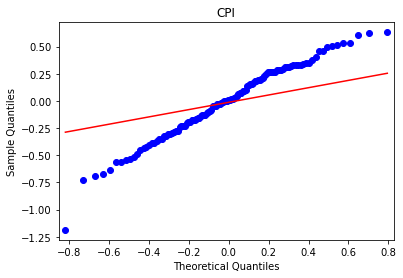

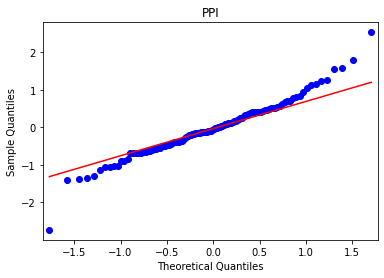

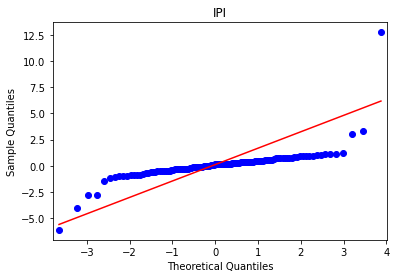

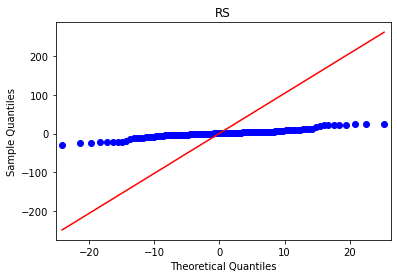

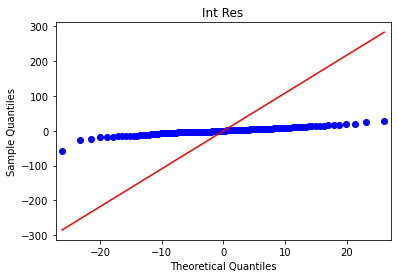

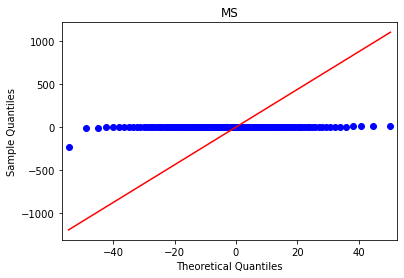

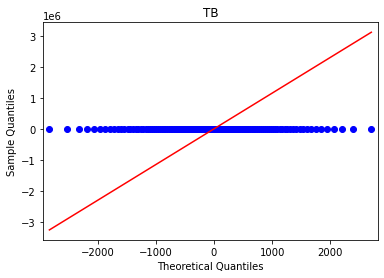

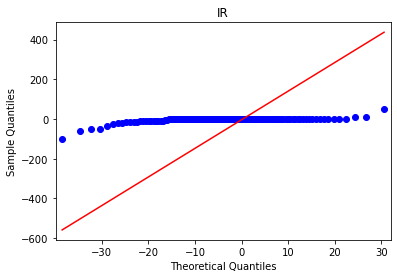

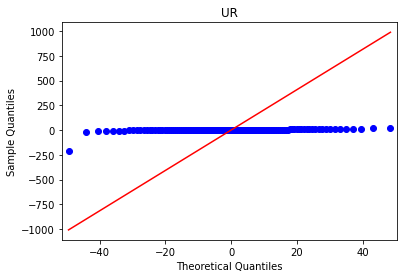

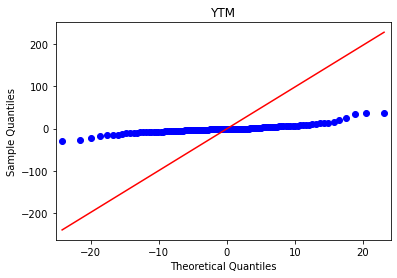

In [12]:
import statsmodels.api as sm
import pylab
import statistics 

#inflation
cpi=df_AU['CPI']

mean1=statistics.mean(cpi) 
st_dev1=statistics.stdev(cpi)
obs_count1=len(cpi)

sm.qqplot(cpi, loc = mean1, scale = st_dev1, line='s')

plt.title('CPI')

#producer price index

ppi=df_AU['PPI']

mean1=statistics.mean(ppi) 
st_dev1=statistics.stdev(ppi)
obs_count1=len(ppi)

sm.qqplot(ppi, loc = mean1, scale = st_dev1, line='s')
plt.title('PPI')

#Industrial Production Index

ipi=df_AU['IPI']

mean1=statistics.mean(ipi) 
st_dev1=statistics.stdev(ipi)
obs_count1=len(ipi)

sm.qqplot(ipi, loc = mean1, scale = st_dev1, line='s')
plt.title('IPI')

#Retail Sales

rs=df_AU['RS']

mean1=statistics.mean(rs) 
st_dev1=statistics.stdev(rs)
obs_count1=len(rs)

sm.qqplot(rs, loc = mean1, scale = st_dev1, line='s')
plt.title('RS')

#International Reserves

inres=df_AU['Int Res']

mean1=statistics.mean(inres) 
st_dev1=statistics.stdev(inres)
obs_count1=len(inres)

sm.qqplot(inres, loc = mean1, scale = st_dev1, line='s')
plt.title('Int Res')

#Monney Supply

ms=df_AU['MS']

mean1=statistics.mean(ms) 
st_dev1=statistics.stdev(ms)
obs_count1=len(ms)

sm.qqplot(ms, loc = mean1, scale = st_dev1, line='s')
plt.title('MS')

#Tradebalance

tb=df_AU['TB']

mean1=statistics.mean(tb) 
st_dev1=statistics.stdev(tb)
obs_count1=len(tb)

sm.qqplot(tb, loc = mean1, scale = st_dev1, line='s')
plt.title('TB')

#Interest Rate

ir=df_AU['IR']

mean1=statistics.mean(ir) 
st_dev1=statistics.stdev(ir)
obs_count1=len(ir)

sm.qqplot(ir, loc = mean1, scale = st_dev1, line='s')
plt.title('IR')

# Unemployment Rate

ur=df_AU['UR']

mean1=statistics.mean(ur) 
st_dev1=statistics.stdev(ur)
obs_count1=len(ur)

sm.qqplot(ur, loc = mean1, scale = st_dev1, line='s')
plt.title('UR')

#Yield to maturity 

ytm=df_AU['YTM']

mean1=statistics.mean(ytm) 
st_dev1=statistics.stdev(ytm)
obs_count1=len(ytm)

sm.qqplot(ytm, loc = mean1, scale = st_dev1, line='s')
plt.title('YTM')



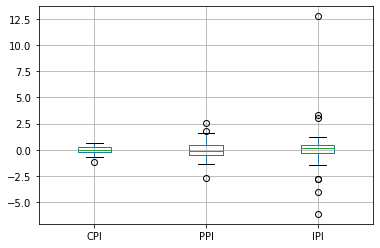

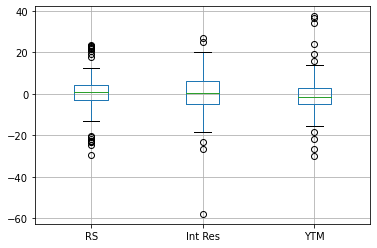

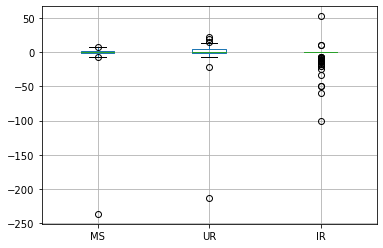

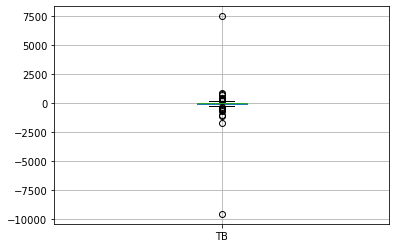

In [13]:
boxplot1=df_AU.boxplot(column=['CPI','PPI','IPI'])
plt.show()

boxplot1=df_AU.boxplot(column=['RS', 'Int Res','YTM'])
plt.show()

boxplot1=df_AU.boxplot(column=['MS','UR', 'IR' ])
plt.show()

boxplot1=df_AU.boxplot(column=['TB'])
plt.show()

In [14]:
stat,p=sp.stats.shapiro(cpi)

print('Normality Test for CPI:')
print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
print('-------------------------------------------------------')
stat,p=sp.stats.shapiro(ppi)

print('Normality Test for PPI:')
print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

print('-------------------------------------------------------')
stat,p=sp.stats.shapiro(ipi)

print('Normality Test for IPI:')
print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

print('-------------------------------------------------------')
stat,p=sp.stats.shapiro(rs)

print('Normality Test for RS:')
print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


print('-------------------------------------------------------')
stat,p=sp.stats.shapiro(inres)

print('Normality Test for Int Res:')
print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


print('-------------------------------------------------------')
stat,p=sp.stats.shapiro(ms)

print('Normality Test for MS:')
print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

print('-------------------------------------------------------')
stat,p=sp.stats.shapiro(tb)

print('Normality Test for TB:')
print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

print('-------------------------------------------------------')
stat,p=sp.stats.shapiro(ir)

print('Normality Test for IR:')
print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

print('-------------------------------------------------------')
stat,p=sp.stats.shapiro(ur)

print('Normality Test for UR:')
print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

print('-------------------------------------------------------')
stat,p=sp.stats.shapiro(ytm)

print('Normality Test for YTM:')
print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


    

Normality Test for CPI:
p-value for Shapiro-Wilk: 
0.11208933591842651
Sample looks Gaussian (fail to reject H0)
-------------------------------------------------------
Normality Test for PPI:
p-value for Shapiro-Wilk: 
0.026662863790988922
Sample does not look Gaussian (reject H0)
-------------------------------------------------------
Normality Test for IPI:
p-value for Shapiro-Wilk: 
9.892092141610578e-17
Sample does not look Gaussian (reject H0)
-------------------------------------------------------
Normality Test for RS:
p-value for Shapiro-Wilk: 
1.825785693654325e-05
Sample does not look Gaussian (reject H0)
-------------------------------------------------------
Normality Test for Int Res:
p-value for Shapiro-Wilk: 
6.519476755784126e-06
Sample does not look Gaussian (reject H0)
-------------------------------------------------------
Normality Test for MS:
p-value for Shapiro-Wilk: 
4.2676967920229645e-23
Sample does not look Gaussian (reject H0)
------------------------------

In [15]:
import statsmodels.tsa.stattools as ts
ts.adfuller(df_AU['Curr'])

(-3.5861406869909094,
 0.00603158332996802,
 5,
 112,
 {'1%': -3.4901313156261384,
  '5%': -2.8877122815688776,
  '10%': -2.5807296460459184},
 519.9341040701877)

### We can reject the null hypothesis of non-stationarity, as the p-value (0.00603) is less than 1%. 